## Описание проекта
**Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс**

**Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:**
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

***Вам предстоит изучить:***
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Загрузите данные и подготовьте их к анализу

In [1]:
#прописываем нужные нам библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from datetime import datetime, timedelta
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
sessions = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [4]:
sessions.head(3)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [5]:
orders.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [6]:
costs.head(3)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


In [7]:
def fun_date(data):
    print('**Общая информация датафрейма**')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Просмотр статистических данных**')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод рандомных строк датафрейма**')
    print(data.sample(n=3, random_state=1))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод первых пяти строк датафрейма**')
    print(data.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва дубликатов датафрейма**')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва пропущеных значений датафрейма**')
    print(data.isnull().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    
display(fun_date(sessions))
display(fun_date(orders))
display(fun_date(costs))

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
-------------------------------------------------------------------------------------------------------------
**Просмотр статистических данных**
            User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11
-------------------------------------------------------------------------------------------------------------
**Вывод рандомн

None

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
-------------------------------------------------------------------------------------------------------------
**Просмотр статистических данных**
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000
-------------------------------------------------------------------------------------------------------------
**Вывод рандомных строк датафрейма*

None

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
-------------------------------------------------------------------------------------------------------------
**Просмотр статистических данных**
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000
-------------------------------------------------------------------------------------------------------------
**Вывод рандомных строк датафрейма**
              dt         Channel    costs
1462  2019-05-23  WahooNetBanner    7.200
510   2019-09-28  RocketSuperAds   11.375
612   2019-07-12         

None

<font color='blue'>Пропущенных значений и дубликатов нет. Остается привети данные в нужный тип и подумать можно ли подсократить память, занимаемую датасетом.</font>

In [8]:
# преобразование данных о времени датасет visits
sessions['Session Start'] = pd.to_datetime(sessions['Session Start'])
sessions['Session End'] = pd.to_datetime(sessions['Session End'])


In [9]:
# преобразование данных о времени датасет orders
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])


In [10]:
# преобразование данных о времени датасет costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
#Смотрим количесво занимаемой памяти для каждого типа
def memory(data):
    for dtype in ['float','int','object']:
        selected_dtype = data.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))
display(memory(sessions))
print()
display(memory(orders))
print()
display(memory(costs))

Average memory usage for float columns: 0.00 MB
Average memory usage for int columns: 1.18 MB
Average memory usage for object columns: 14.39 MB


None


Average memory usage for float columns: 0.15 MB
Average memory usage for int columns: 0.15 MB
Average memory usage for object columns: 0.00 MB


None


Average memory usage for float columns: 0.01 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.06 MB


None

<font color='blue'>Больше всего памяти занимает датасет visits с колонками типа object, к сожалению привести их к интовым значениям не получится, поэтому оставляем как есть.</font>

<font color='blue'>Датасет orders  можно перевести в 32х битные значения, но не вижу особого смысла, тк этот датасет не громоздкий и не замысловатый</font>

In [12]:
#сводим значения к одному регистру
def lower_data(data):
    data.columns = map(str.lower, data.columns)
lower_data(sessions)
lower_data(orders)
lower_data(costs)


In [13]:
sessions = sessions.rename(columns={'user id': 'user_id', 'session start': 'session_start','session end': 'session_end'})

In [14]:
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

<font color='blue'>Привел названия столбцов к змеиному регистру, но костылями, если подскажешь удобную функцию, буду благодарен))</font>

<font color='blue'>Предобработка завершена, можно приступать к анализу. Окей летсгоу</font>

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Profile users

In [17]:
def get_profiles(sessions,orders,costs):

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'region': 'first', 'device': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs']/costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles 

In [18]:
profiles = get_profiles(sessions, orders, costs)
profiles.head(3)

,user_id,first_ts,channel,region,device,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False,0.000000


### Retention Rate

In [19]:

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time


In [20]:
#group_by_dimensions(df,2,10)

In [21]:
retention_raw, retention,result_in_time = get_retention(
    profiles, sessions, observation_date,horizon_days,dimensions = [] )



In [22]:
retention_raw

,user_id,first_ts,channel,region,device,dt,month,payer,acquisition_cost,session_start,lifetime
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:58:57,0
1,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:00:42,0
2,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:33:16,1
3,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237,2019-07-09 12:46:07,0
4,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237,2019-07-10 22:27:24,1
...,...,...,...,...,...,...,...,...,...,...,...
297803,999976332130,2019-07-23 02:57:06,TipTop,United States,iPhone,2019-07-23,2019-07-01,False,2.600000,2019-07-23 02:57:06,0
297804,999979924135,2019-09-28 21:28:09,MediaTornado,United States,PC,2019-09-28,2019-09-01,False,0.205714,2019-09-28 21:28:09,0
297805,999979924135,2019-09-28 21:28:09,MediaTornado,United States,PC,2019-09-28,2019-09-01,False,0.205714,2019-10-04 07:37:05,5
297806,999999563947,2019-10-18 19:57:25,organic,United States,iPhone,2019-10-18,2019-10-01,False,0.000000,2019-10-18 19:57:25,0


In [23]:
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,134200,1.0,0.176811,0.086356,0.051468,0.034493,0.024516,0.018443,0.013994,0.011818,0.009478,0.007750,0.006610,0.005872,0.004575
True,8420,1.0,0.404751,0.316746,0.259739,0.226841,0.209264,0.187767,0.173634,0.162589,0.150950,0.149406,0.137173,0.133373,0.121496


In [24]:
result_in_time

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-15           42  1.0  0.404762  0.285714  0.261905  0.166667   
      2019-10-16           33  1.0  0.454545  0.333333  0.303030  0.121212   
      2019-10-17           38  1.0  0.315789  0.263158  0.210526  0.078947   
      2019-10-18           61  1.0  0.327869  0.327869  0.213115  0.213115   
      2019-10-19           59  1.0  0.406780  0.338983  0.254237  0.220339   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.021889  0.023041  0.012673  0.013825  0.011521  0.006912   
      2019-05-02  0.017857  0.015110  0.012363  0.008242  0.005495  0.012363   
      2019-05-03  0.035936  0.022305  0.022305  0.011152  0.009913  0.008674   
      2019-05-04  0.016667  0.019792  0.009375  0.013542  0.010417  0.011458   
      2019-05-05  0.020321  0.020321  0.018182  0.010695  0.004278  0.005348   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-15  0.119048  0.119048  0.142857  0.119048  0.190476  0.095238   
      2019-10-16  0.181818  0.272727  0.151515  0.181818  0.121212  0.181818   
      2019-10-17  0.105263  0.052632  0.105263  0.157895  0.131579  0.105263   
      2019-10-18  0.344262  0.147541  0.147541  0.196721  0.131148  0.147541   
      2019-10-19  0.203390  0.101695  0.203390  0.186441  0.152542  0.101695   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.010369  0.004608  0.005760  
      2019-05-02  0.010989  0.012363  0.004121  
      2019-05-03  0.004957  0.004957  0.004957  
      2019-05-04  0.009375  0.004167  0.007292  
      2019-05-05  0.006417  0.009626  0.003209  
...                    ...       ...       ...  
True  2019-10-15  0.119048  0.047619  0.166667  
      2019-10-16  0.060606  0.060606  0.121212  
      2019-10-17  0.026316  0.157895  0.000000  
      2019-10-18  0.147541  0.114754  0.049180  
      2019-10-19  0.186441  0.101695  0.000000  

[344 rows x 15 columns]

### Vision Retention Rate

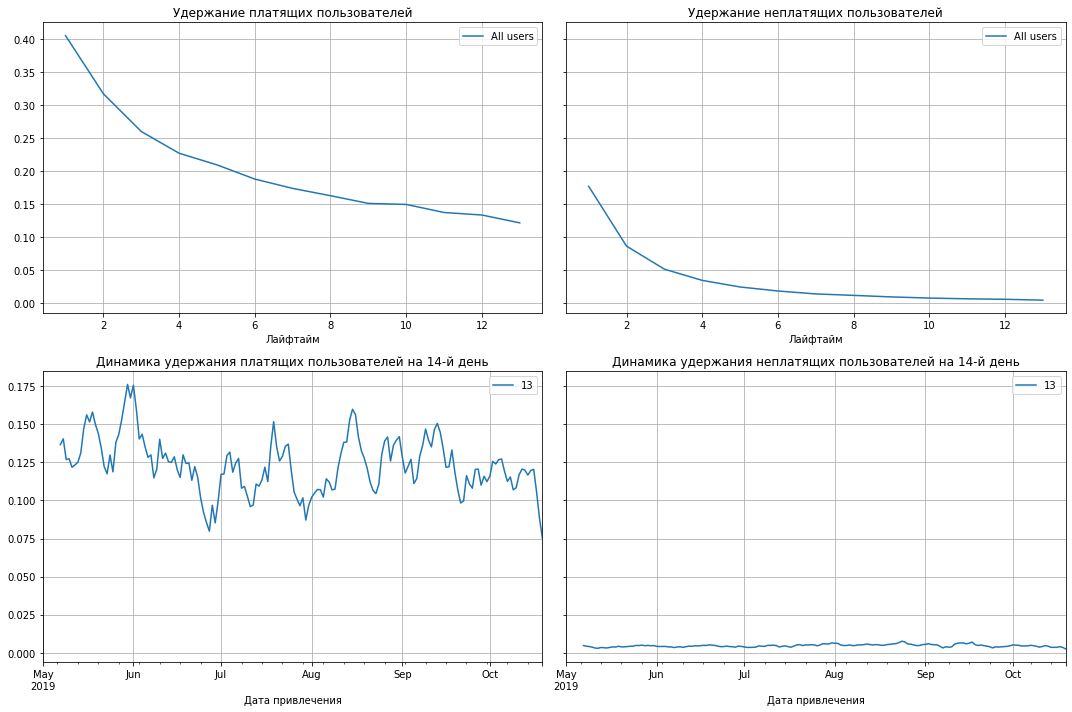

In [25]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = result_in_time.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    
plot_retention(retention,result_in_time, horizon_days,7)

### Conversion

In [26]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [27]:
#conversion = get_conversion(
#    profiles,
#    orders,
#    observation_date,
#    horizon_days,
#    dimensions=[])
#display(conversion)

### Vision Conversion

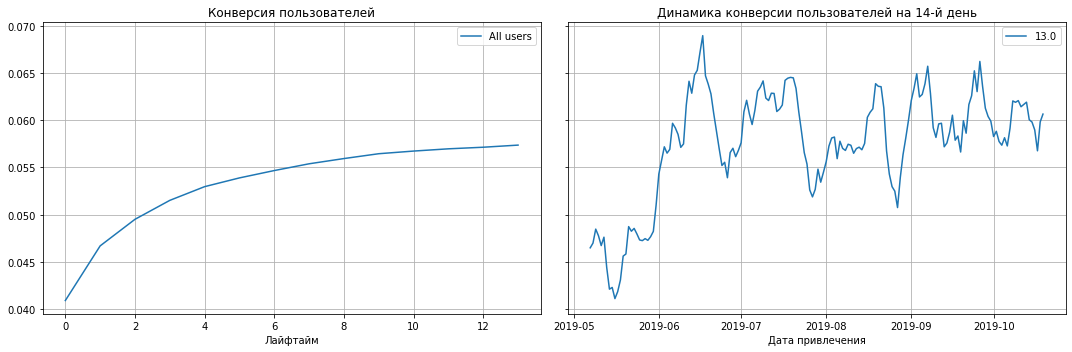

In [28]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[]
    
)
plot_conversion(conversion, conversion_history,horizon_days, 7) 

### LTV

In [29]:
def get_ltv(
    profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        orders[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
# сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [30]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)


In [31]:
ltv_history

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.160297,0.215193,0.260209,0.294246,0.316205,0.316205,0.327184,0.338163,0.382079,0.426029,0.469945,0.502882,0.508372,0.524840
2019-05-02,758,0.157995,0.302942,0.335858,0.381939,0.408272,0.441201,0.454367,0.493865,0.526781,0.546530,0.572863,0.579446,0.592612,0.612361
2019-05-03,849,0.165748,0.249211,0.326796,0.379694,0.503227,0.550259,0.556137,0.562014,0.591402,0.620789,0.632544,0.667809,0.691319,0.708952
2019-05-04,1015,0.232138,0.286217,0.315714,0.359970,0.459369,0.518365,0.528197,0.557695,0.582276,0.601941,0.616690,0.656020,0.656020,0.690433
2019-05-05,970,0.140969,0.229546,0.244979,0.265557,0.291278,0.317000,0.332433,0.347866,0.353010,0.363299,0.389021,0.399309,0.419887,0.425031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,674,0.266528,0.318353,0.362774,0.414614,0.453116,0.467923,0.490134,0.504941,0.512344,0.534555,0.564169,0.586380,0.601187,0.615994
2019-10-16,656,0.190183,0.228216,0.282988,0.328628,0.328628,0.359055,0.398613,0.413826,0.453399,0.461006,0.483826,0.491433,0.514253,0.529466
2019-10-17,703,0.235704,0.278293,0.399090,0.413286,0.420384,0.434580,0.441679,0.462973,0.484267,0.519758,0.541053,0.548151,0.577966,0.577966


### Vision LTV

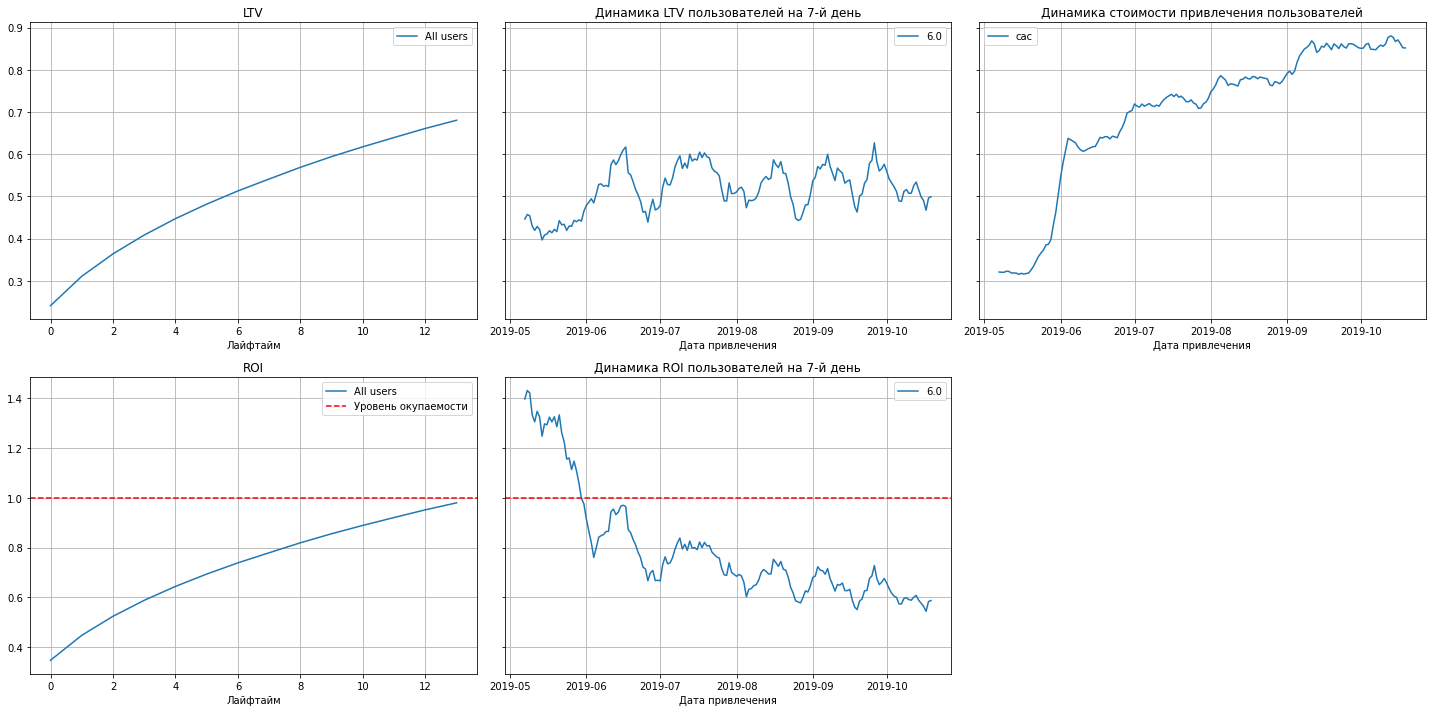

In [32]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=[]
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 7) 

<font color='blue'>Функции заданы и работают.</front>

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [33]:
profiles.head()

,user_id,first_ts,channel,region,device,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False,0.230769


profiles.groupby('user_id').agg(
    {'dt': ['min', 'max']})

In [34]:
#Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date)
print(max_date)

2019-05-01
2019-10-27


<font color='blue'>Все по ТЗ, едем дальше</font>

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
(profiles.
    pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean']).reset_index()
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ration'})
    .droplevel(1, axis=1)
    .sort_values(by='ration', ascending=False)
    .style.format({'ration':'{:.2%}'}))

,region,all_users,paying_users,ration
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


<font color = 'blue'>Большинсво платящих клиентов из Америки, я думаю это также связано с численностью населения, относительно других стран </font>

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [36]:
(profiles.
    pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean']).reset_index()
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ration'})
    .droplevel(1, axis=1)
    .sort_values(by='ration', ascending=False)
    .style.format({'ration':'{:.2%}'}))


,device,all_users,paying_users,ration
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


In [37]:

prop = (profiles.
    pivot_table(index=['device','region'], values='payer', aggfunc=['count', 'sum', 'mean']).reset_index()
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ration'})
    .droplevel(1, axis=1)
    .sort_values(by='ration', ascending=False))
    #.style.format({'ration':'{:.2%}'}))
#prop    
prop = prop.groupby(['device','region']).agg({'paying_users' : 'sum'})
prop

paying_users
device  region                     
Android France                  179
        Germany                 182
        UK                      202
        United States          1487
Mac     France                   82
        Germany                  61
        UK                       63
        United States          1706
PC      France                  268
        Germany                 253
        UK                      301
        United States           715
iPhone  France                  134
        Germany                 120
        UK                      134
        United States          2994

Проверка на корреляцию страны/девайса, для проверки гипотезы и будущих выводов, не стал использовать scatter_matrix, таблицей мне боллее нагляднее

<font color='blue'>Большинсво пользователей предпочитают технику apple, особенно в Америке</font>

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [38]:
pr = (profiles.
    pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean']).reset_index()
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ration'})
    .droplevel(1, axis=1)
    .sort_values(by='ration', ascending=False)
    .style.format({'ration':'{:.2%}'}))
pr

,channel,all_users,paying_users,ration
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


<font color='blue'>Наиболее выгодными рекламными источниками оказались:</font>

<font color='blue'>FaceBoom - 12,20%</font>

<font color='blue'>AdNonSense - 11.34%</font>

<font color='blue'>lambdaMediaAds	- 10.47%</font>

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [39]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [40]:
#Посчитайте общую сумму расходов на маркетинг.
costs['costs'].sum()

105497.30000000002

### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [41]:
cost_channel = (costs.pivot_table(index = 'channel', values = 'costs', aggfunc=['sum']).reset_index())
cost_channel
#cost_channel['costs'].T.plot()

,channel,sum
,,costs
0,AdNonSense,3911.25
1,FaceBoom,32445.60
2,LeapBob,1797.60
3,MediaTornado,954.48
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,TipTop,54751.30
7,WahooNetBanner,5151.00
8,YRabbit,944.22


<AxesSubplot:xlabel='dt'>

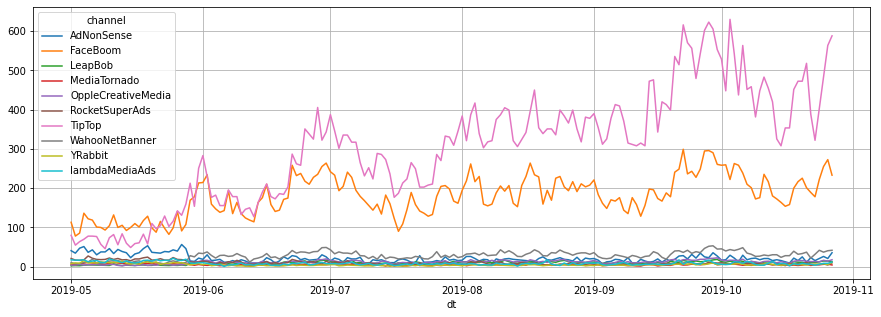

In [42]:
costs.pivot_table(index='dt',columns='channel', values = 'costs', aggfunc='sum').plot.line(figsize=(15,5), grid = True)

<font color='blue'>Лидируют по затратам на рекламу иточники TipTop и FaceBoom</font>

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике

In [43]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


<AxesSubplot:xlabel='week,month'>

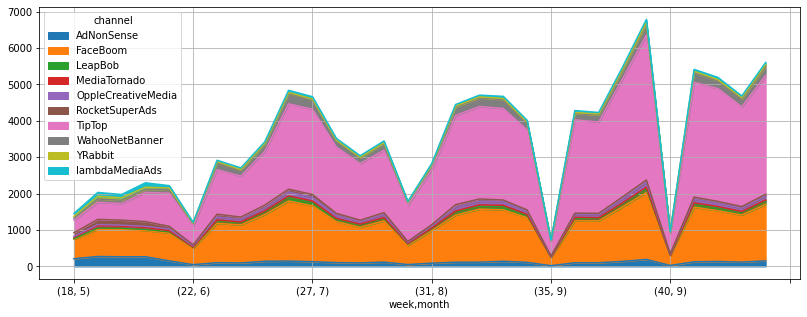

In [44]:
dates=[costs['week'],costs['month']]
for i, part in enumerate(dates):

    costs1 = costs.pivot_table(index = ['week','month'], columns = 'channel', values = 'costs', aggfunc = 'sum')

costs1.plot.area(figsize=(30,5), grid = True,ax = plt.subplot(1, 2, i + 1))    

<font color='blue'>Заметен рост расходов в сентябре-октябре, непонтяны аномалии в начале месяца, возможно это переходные состояния стратегии рекламы

Рассмотрим подробнее</font>

In [45]:
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


In [46]:
cost_trand = costs.pivot_table(index='dt',values='costs')
cost_trand.head(3)

,costs
dt,
2019-05-01,30.4820
2019-05-02,23.0845
2019-05-03,26.3070


In [47]:
cost_trand.sort_index(inplace=True)
cost_trand = cost_trand.resample('1H').sum()
cost_trand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4297 entries, 2019-05-01 00:00:00 to 2019-10-27 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   costs   4297 non-null   float64
dtypes: float64(1)
memory usage: 67.1 KB


In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(cost_trand)

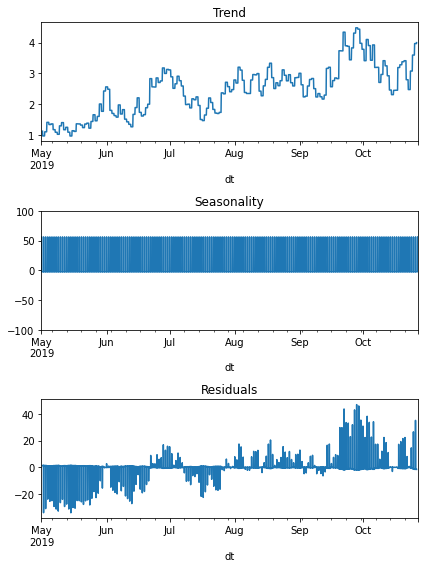

In [49]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim('2019-05-01', '2019-10-27')
plt.ylim(-100, 100)
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:xlabel='dt'>

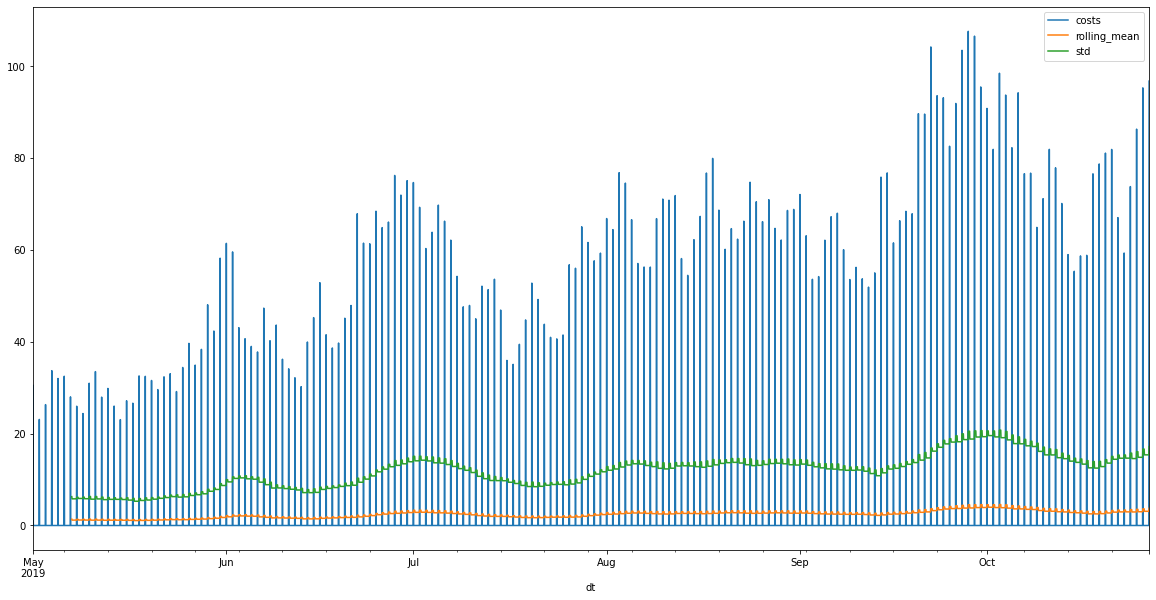

In [50]:
cost_trand['rolling_mean'] = cost_trand.rolling(150).mean()
cost_trand['std'] = cost_trand['costs'].rolling(150).std()
cost_trand.plot(figsize=[20, 10])

<font color='blue'>Вывод с ростом расходов осенью подтвердился, можно обратить внимание на сезонность, ряд стационарный, предположу, что в рекламу вкладывались не опираясь на сезонности и тренды, так сказать заплатить, чтобы заплатить...

Также судя по скользящему отклонению и тому, что ряд не стационарный, трудно будет спрогнозировать, тк он имеет много меняющихся значений и зависимтостей </font>

### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей

In [51]:
profiles.head()

,user_id,first_ts,channel,region,device,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False,0.230769


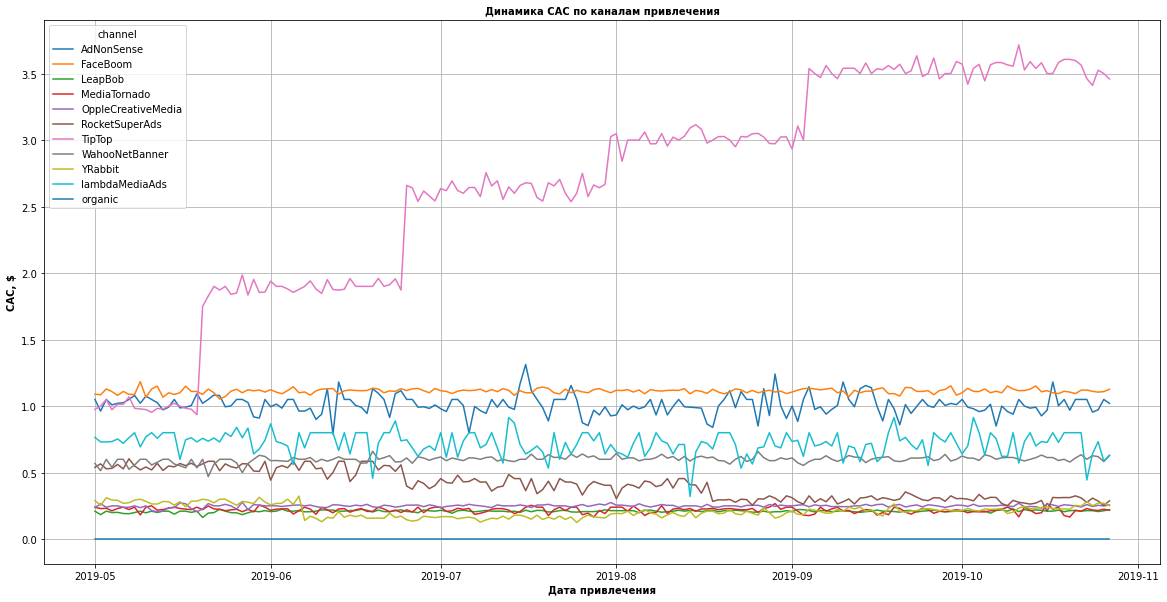

In [52]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
      
plt.ylabel('CAC, $',fontweight='bold',fontsize=10)
plt.xlabel('Дата привлечения',fontweight='bold',fontsize=10)
plt.title('Динамика САС по каналам привлечения',fontweight='bold',fontsize=10)
plt.show()

<font color='blue'>Самым дорогим источником оказался TipTop, но этот источник входит в топ привлеченности клиентов,
    плюс не известно какой это вид рекламы...так что не так все однозначно</font>

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, стоит обратить особое внимание на каналы TipTop и FaceBoom

</div>


## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [53]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

<font color='blue'>Органических пользователей исключили в момент создания функции</font>

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее решение, ведь за них мы ничего не платим👍

</div>


### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [54]:
profiles = profiles.query('channel != "organic"')

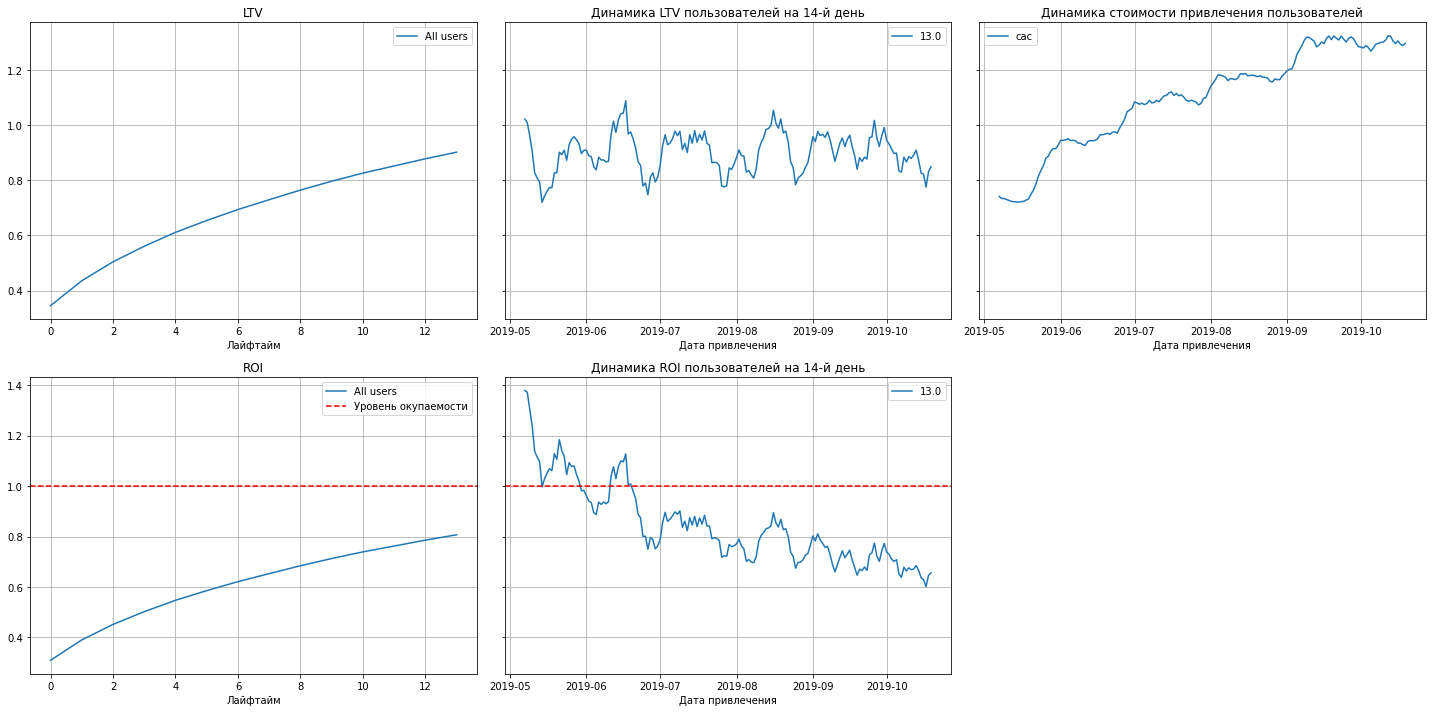

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

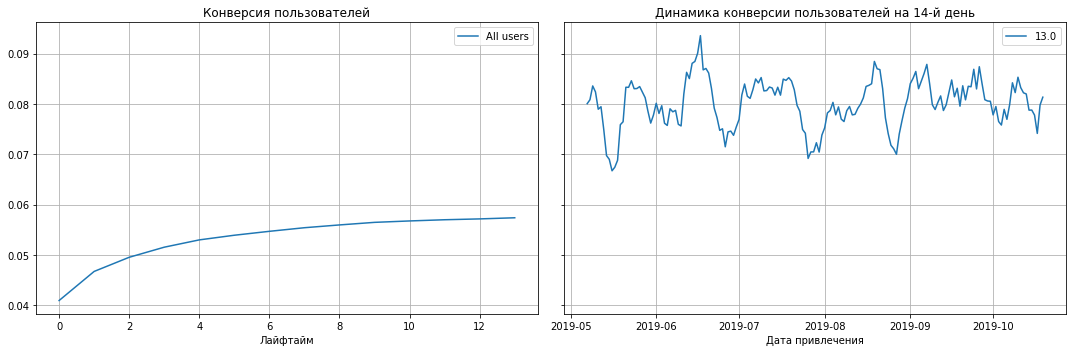

In [56]:
#conversion,conversion_history = get_conversion(
#    profiles,
#    orders,
#    observation_date,
#    horizon_days,
#    dimensions=[])
#display(conversion)

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)
plot_conversion(conversion, conversion_history,horizon_days, 7) 

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

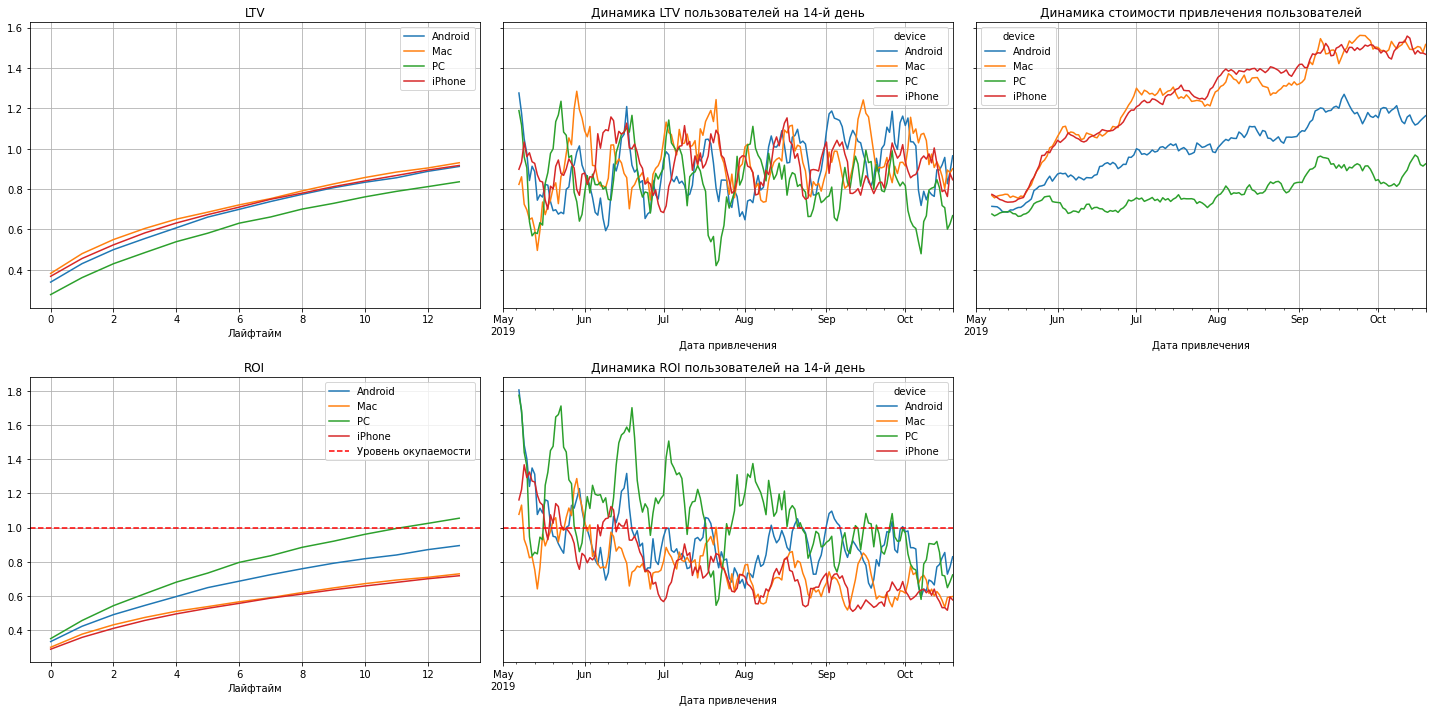

In [57]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

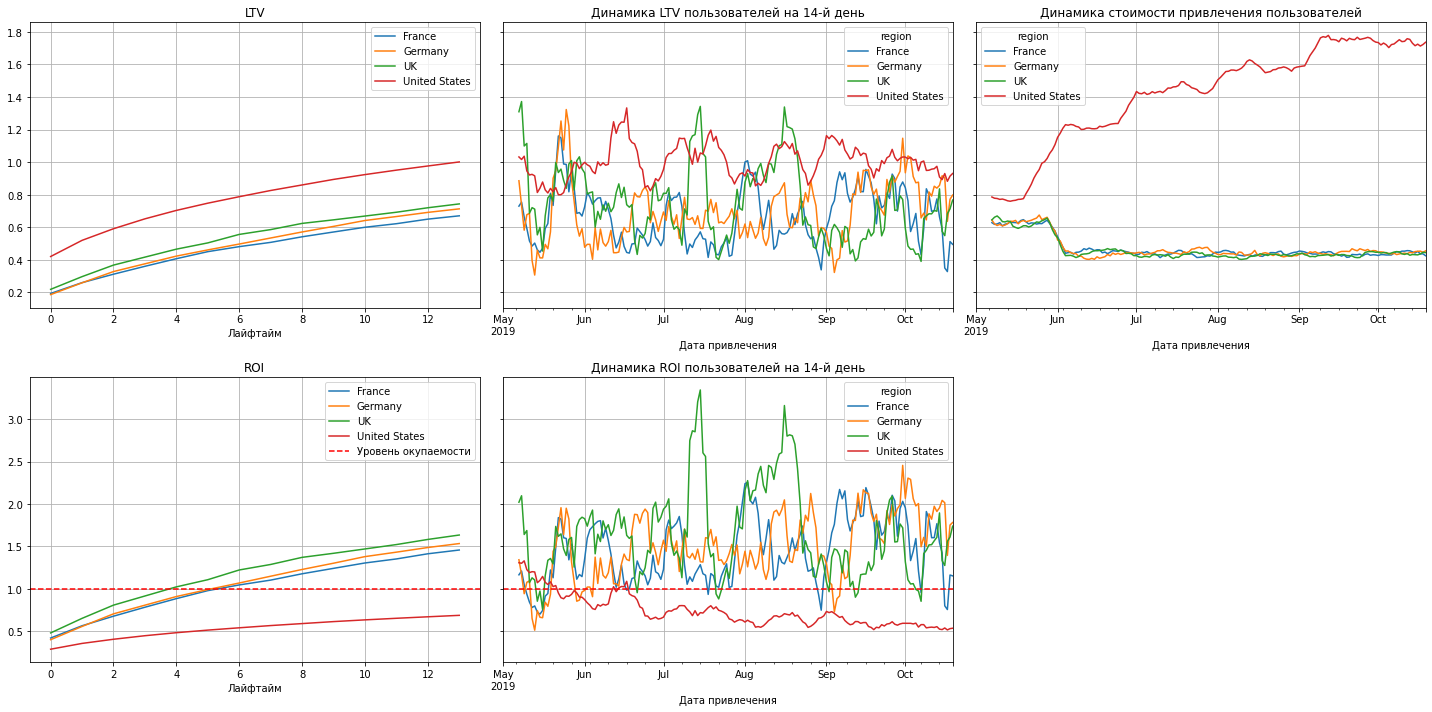

In [58]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

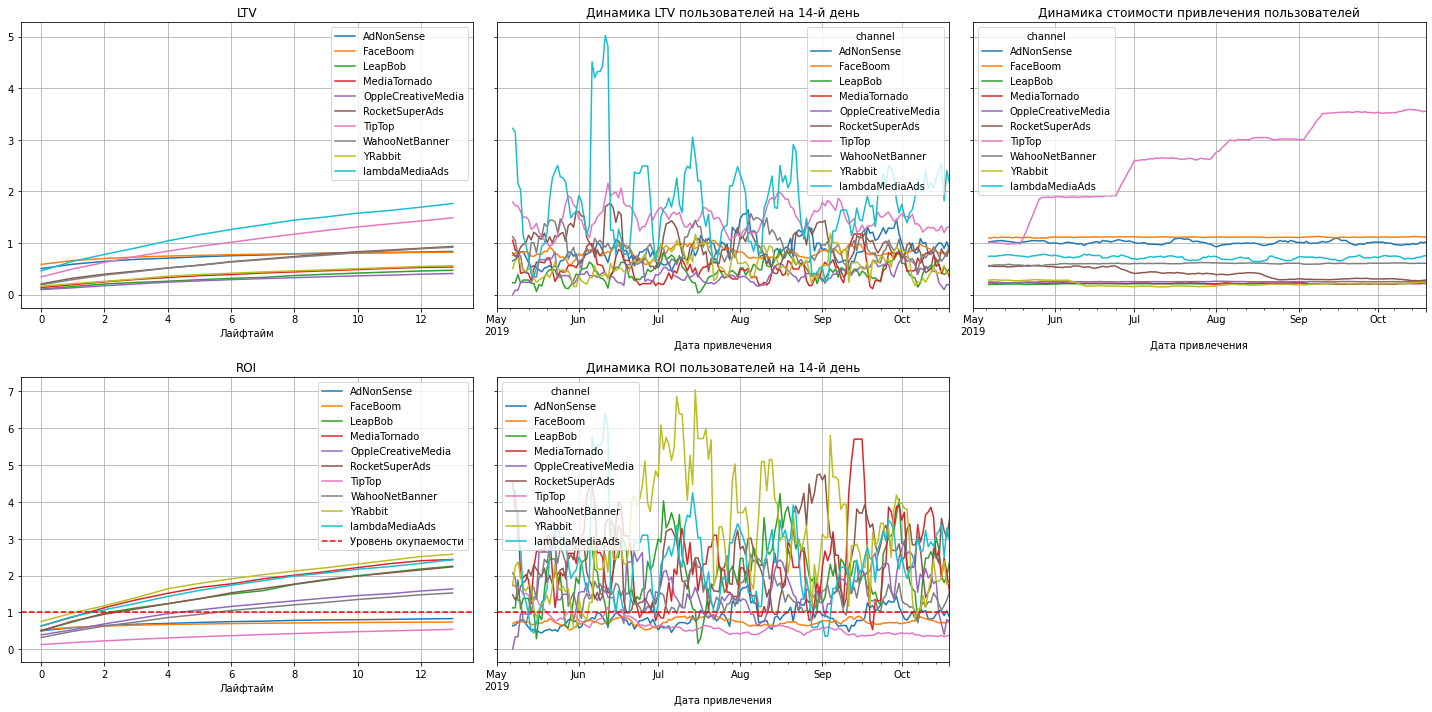

In [59]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<font color='blue'>Судя по графикам можно сказать, что в целом окупаемость рекламной компании можно назвать неплохой, тк более половины источников перескочили порог окупаемости</font>

<font color='blue'>На счет девайсов, которые используют пользователи - это в основном PC, тк в мобильных приложениях заметно снижение окупаемости, возможно в приложении есть баг, который не позволяет корректно/комфортно оформить заказ, почему именно на этом этапе? Потому  что удержание пользователей хорошее, особенно к осени, впрочем тогда и произошел прирост пользователей тк вложили много денег в рекламу. Соответсвенно продукт может заинтересовать пользователя, но довести весь жизненный цикл покупателя не получается.</font>

<font color='blue'>Хуже всего себя показывает Америка, у нее самая низкая окупаемость, скорее всего страна коррелирует с девайсом и в Америке в основном используют технику apple</font>

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<font color='blue'>Из проделанной работы могу сказать, что отделу маркетинга стоит лучше проработать тренды и сезонности в каждой стране, и по источнику рекламы и проработать виды рекламы(клик, баннер и тд), а не пулять бездумно суммы денег абы на что.

Также стоит отметить важный момент с мобильными устройствами, тут явный баг, который нужно протестить и срочно фиксить, а не закладывать в низ беклога

О более тонких моментах - написал выше.</font>